# Sleep Classification

Read in the data from 2_FYDP_ML_feature_extraction. We read in data representing the approach of keeping sleep status, filtering the feature space. Decision Tree binary classification algorithm was used. 

---
---

# <h1><font color='orange'> 1. Set up </font></h2>


In [1]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
import json

class JSONEncoder(json.JSONEncoder):
    def default(self, obj):
        if hasattr(obj, 'to_json'):
            return obj.to_json(orient='records')
        return json.JSONEncoder.default(self, obj)

In [4]:
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 50)

In [5]:
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
os.chdir('/content/drive/My Drive/FYDP_data') # Ainley's directory   

# <h1><font color='orange'> 2. Read in the data </font></h2>

## Read in the filtered extracted_features dictionary from the Json file

In [7]:
json_filtered_extract_features_df_data = json.load(open('no_step_map_subject_id_to_its_filtered_extracted_features_df.json'))

In [8]:
subject_id_to_filtered_extracted_feature_df_map = {}
for subject_id, sensor_df in tqdm(json_filtered_extract_features_df_data.items()):
    subject_id_to_filtered_extracted_feature_df_map[subject_id] = pd.read_json(json_filtered_extract_features_df_data[subject_id])

  0%|          | 0/31 [00:00<?, ?it/s]

Manually inspect the features in this dictionary

In [9]:
for student_id, df in subject_id_to_filtered_extracted_feature_df_map.items():
    print("--------------------", student_id, "--------------------")
    print("This subject has the shape", df.shape, "\n")

-------------------- 46343 --------------------
This subject has the shape (553, 363) 

-------------------- 759667 --------------------
This subject has the shape (474, 396) 

-------------------- 781756 --------------------
This subject has the shape (980, 284) 

-------------------- 844359 --------------------
This subject has the shape (897, 272) 

-------------------- 1066528 --------------------
This subject has the shape (947, 699) 

-------------------- 1360686 --------------------
This subject has the shape (925, 267) 

-------------------- 1449548 --------------------
This subject has the shape (953, 416) 

-------------------- 1455390 --------------------
This subject has the shape (955, 216) 

-------------------- 1818471 --------------------
This subject has the shape (958, 216) 

-------------------- 2598705 --------------------
This subject has the shape (954, 405) 

-------------------- 2638030 --------------------
This subject has the shape (948, 197) 

---------------

## Read in the unfiltered_extracted_features dictionary from Json file

**This block of code isn't really necessary but just checking**

In [10]:
json_unfiltered_extract_features_df_data = json.load(open('no_step_map_subject_id_to_its_unfiltered_extracted_features_df.json'))

subject_id_to_unfiltered_extracted_feature_df_map = {}
for subject_id, sensor_df in tqdm(json_unfiltered_extract_features_df_data.items()):
    subject_id_to_unfiltered_extracted_feature_df_map[subject_id] = pd.read_json(json_unfiltered_extract_features_df_data[subject_id])

# Manually inspect this data
for subject_id, df in subject_id_to_unfiltered_extracted_feature_df_map.items():
    print("--------------------", subject_id, "--------------------")
    print("This subject has the shape", df.shape, "\n")


## Read in the dictionary mapping the psg_status to the session id

In [12]:
map_subject_id_to_a_map_of_the_session_id_to_psg_status = json.load(open('map_subject_id_to_a_map_of_the_session_id_to_psg_status.json'))


## Create an inverted version of this map - mapping psg_status to the session_id's


In [13]:
map_subject_id_to_a_map_of_the_psg_status_to_session_id = {}

for subject_id, subjects_session_to_psg_map in map_subject_id_to_a_map_of_the_session_id_to_psg_status.items():

    subjects_psg_to_session_map = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    for session_id, psg_status in subjects_session_to_psg_map.items():
      
        subjects_psg_to_session_map[psg_status].append(int(session_id))

    map_subject_id_to_a_map_of_the_psg_status_to_session_id[subject_id] = subjects_psg_to_session_map

Manually inspect this dictionary


In [14]:
i = 0
for sub_id, psg_to_id_dict in map_subject_id_to_a_map_of_the_psg_status_to_session_id.items():

    # print the subject_id
    print("----------------", sub_id, "---------------------")

    # iterate through the dictionary and print the values
    for psg_status, session_id in psg_to_id_dict.items():
        print(psg_status, "->", session_id)

    # stop after 2 subjects
    if i == 1:
        break
    i = i + 1

---------------- 46343 ---------------------
0 -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 110, 111, 112, 113, 132, 305, 384, 397, 398, 399, 461, 462, 493, 494, 510, 511, 515, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552]
1 -> [34, 35, 36, 37, 114, 306, 307, 320, 323, 324, 325, 327, 328, 385, 386, 400, 413, 463, 464, 495, 496, 500, 512, 513, 514, 516, 517, 518, 519]
2 -> [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 115, 116, 117, 118, 119, 133, 134, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 321, 322, 326, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 401, 402, 403

# <h1><font color='orange'>3. Create the functions needed for the classification</font></h2>

## Create a function to create the dataset and y needed in the classification using these extracted features


In [15]:
def create_map_of_subject_id_to_the_dataset_and_y_for_only_REM_and_nREM_psg_status(subject_id_to_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status):

    map_subject_id_to_all_psg_dataset_and_y = {}
    map_subject_id_to_binary_dataset_and_y = {}

    for subject_id, extracted_features_df in tqdm(subject_id_to_extracted_feature_df_map.items()):

        # get the map of psg_status to session_id for this subject
        subjects_psg_to_session_map = map_subject_id_to_a_map_of_the_psg_status_to_session_id[subject_id]

        # get the map of session_id to psg_status for this subject
        subjects_session_to_psg_map = map_subject_id_to_a_map_of_the_session_id_to_psg_status[subject_id]

        # group the features based on whether the person is REM or NON REM 
        rem_features = extracted_features_df.iloc[subjects_psg_to_session_map[5], :].values
        nonrem_features = extracted_features_df.iloc[subjects_psg_to_session_map[1] + subjects_psg_to_session_map[2] + subjects_psg_to_session_map[3] + subjects_psg_to_session_map[4] + subjects_psg_to_session_map[0], :].values

        # Creating the feature vector for the REM OR NREM and asleep features to be used as the training data
        binary_psg_status_dataset = np.vstack((rem_features, nonrem_features))

        # Creating labels here as the target vector - as the above 'y' list contains all psg_status', we need to change it so that it only contains binary values
        all_psg_status_y = list(subjects_session_to_psg_map.values())
        binary_psg_status_y = []
        for binary_val in all_psg_status_y:
            if binary_val in [0, 1, 2, 3, 4]: # everything that is NOT rem
              binary_val = 0
            if binary_val in [5]: # REM
              binary_val = 1
            binary_psg_status_y.append(binary_val)

        # ensure that the dataset and y are the same size
        assert len(binary_psg_status_dataset) == len(binary_psg_status_y)

        # create a dictionary mapping each subject_id to a tuple of the dataset and 'y' for all of the different psg_status'
        map_subject_id_to_binary_dataset_and_y[subject_id] = (binary_psg_status_dataset, binary_psg_status_y)

    return map_subject_id_to_binary_dataset_and_y

Create functions to classify the dataset and y

In [16]:
def create_fit_and_score_the_model(classifier_dict, X_train, y_train, X_test, y_test, optimised_boolean, cv_settings):

    if optimised_boolean:
        # create an optimised model by cross validating with the various parameters
        clf = make_pipeline(StandardScaler(), GridSearchCV(classifier_dict['model'], classifier_dict['parameters'], cv=cv_settings, refit=True))

    else:
        # create the default model
        clf = make_pipeline(StandardScaler(), classifier_dict['model'])

    # train the classifier
    clf.fit(X_train, y_train)

    # get a prediction for y based on a test set
    y_pred = clf.predict(X_test)

    # output a report on the precision and recall to ensure that the model is not cheating by just predicting the most common class
    class_report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # we now have the best parameters to use with the classifier
    score = clf.score(X_test, y_test)

    return score, class_report_dict

In [24]:
def classify(map_subject_id_to_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classifier_report_bool):

    # create dataframe for storing results
    score_results = pd.DataFrame(columns=["subject_id"].extend(names_of_models_to_test))
    map_subject_to_classifier_to_classification_report = {}

    for subject_id, tuple_of_dataset_and_y in tqdm(map_subject_id_to_dataset_and_y.items()):

        # skip the subjects that are causing problems
        # I suspect that it is becauce there are some rows with psg_status = '4' which, based on the input data and the paper asssociated with the dataset, shoulcn't be there
        if subject_id in ['5383425', '8258170', '9618981']:
            continue

        # assign the dataset and the 'y' variable
        dataset = tuple_of_dataset_and_y[0]
        y = tuple_of_dataset_and_y[1]

        # create train-test split
        X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=42)

        # create a dictionery to map classifier to a score
        row_of_scores_df = pd.DataFrame(columns=["subject_id"].extend(names_of_models_to_test), index=[0])

        # populate the row with subject_id
        row_of_scores_df.loc[0, 'subject_id'] = subject_id

        map_classifiers_to_classification_report = {}

        # for each model we score the parameters and we can then get an average for each set of parameters
        for classifier_name, classifier_dict in classifiers.items():
            
            # create a model, train it and test it to produce a score
            score, classification_report_dict = create_fit_and_score_the_model(classifier_dict, X_train, y_train, X_test, y_test, optimise_params_bool, cv_settings)

            # add this score to the scores from the other classifiers for this subject
            row_of_scores_df.loc[0, classifier_name] = score

            # add the classification report to a dictionary
            map_classifiers_to_classification_report[classifier_name] = classification_report_dict

        map_subject_to_classifier_to_classification_report[subject_id] = map_classifiers_to_classification_report

        # Add the row of scores to the row of scores recorded for the other subjects
        score_results = pd.concat([score_results, row_of_scores_df], axis=0)

    if classifier_report_bool:
        return score_results.reset_index(drop=True), map_subject_to_classifier_to_classification_report

    else:
        return score_results.reset_index(drop=True)

# 4. Classify the data

In [19]:
names_of_models_to_test = ['Decision Tree']

model_function_for_these_models = [DecisionTreeClassifier()]

params_for_these_models = [{'criterion':('gini', 'entropy'), 'splitter':('best', 'random')}] #plenty more to add if needed                          ]

In [20]:
classifiers = {}
for i in range(len(names_of_models_to_test)):

    model_name = names_of_models_to_test[i]
    model_function = model_function_for_these_models[i]
    model_params = params_for_these_models[i]

    classifiers[model_name] = {}
    classifiers[model_name]["model"] = model_function
    classifiers[model_name]["parameters"] = model_params

print(classifiers)

{'Decision Tree': {'model': DecisionTreeClassifier(), 'parameters': {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random')}}}


In [21]:
cv_settings = KFold(n_splits=4, shuffle=True)


In [22]:
binary_psg_status_dataset_and_y = create_map_of_subject_id_to_the_dataset_and_y_for_only_REM_and_nREM_psg_status(subject_id_to_filtered_extracted_feature_df_map, map_subject_id_to_a_map_of_the_psg_status_to_session_id, map_subject_id_to_a_map_of_the_session_id_to_psg_status)


  0%|          | 0/31 [00:00<?, ?it/s]

In [25]:
optimise_params_bool = True
classification_report_bool = True
binary_results, binary_classification_report_dict = classify(binary_psg_status_dataset_and_y, names_of_models_to_test, cv_settings, optimise_params_bool, classification_report_bool)
     

  0%|          | 0/31 [00:00<?, ?it/s]

In [26]:
binary_results


,subject_id,Decision Tree
0,46343,0.836066
1,759667,0.866242
2,781756,0.734568
3,844359,0.703704
4,1066528,0.757188
5,1360686,0.823529
6,1449548,0.796825
7,1455390,0.854430
8,1818471,0.766562
9,2598705,0.768254


In [27]:
binary_results.describe()


,Decision Tree
count,28.000000
mean,0.838271
std,0.081736
min,0.703704
25%,0.765208
50%,0.845248
75%,0.882239
max,1.000000


<AxesSubplot:>

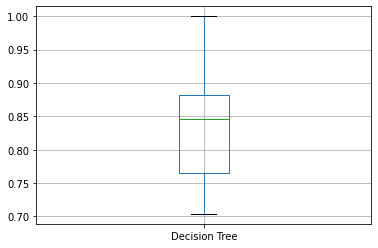

In [28]:
binary_results.boxplot()


In [ ]:
binary_classification_report_dict


{'46343': {'Decision Tree': {'0': {'precision': 0.9172413793103448,
    'recall': 0.9172413793103448,
    'f1-score': 0.9172413793103448,
    'support': 145},
   '1': {'precision': 0.6842105263157895,
    'recall': 0.6842105263157895,
    'f1-score': 0.6842105263157895,
    'support': 38},
   'accuracy': 0.8688524590163934,
   'macro avg': {'precision': 0.8007259528130671,
    'recall': 0.8007259528130671,
    'f1-score': 0.8007259528130671,
    'support': 183},
   'weighted avg': {'precision': 0.8688524590163934,
    'recall': 0.8688524590163934,
    'f1-score': 0.8688524590163934,
    'support': 183}}},
 '759667': {'Decision Tree': {'0': {'precision': 0.9368421052631579,
    'recall': 0.8476190476190476,
    'f1-score': 0.8900000000000001,
    'support': 105},
   '1': {'precision': 0.7419354838709677,
    'recall': 0.8846153846153846,
    'f1-score': 0.8070175438596492,
    'support': 52},
   'accuracy': 0.8598726114649682,
   'macro avg': {'precision': 0.8393887945670628,
    'recal